# Spiral Arms, Gas, and Young Stars in NIHAO


Both young stars and gas follow spiral arm overdensities. *Up to which stellar age are they spatially and chemically coherent?*  

This script traces the face on position and iron abundance [Fe/H] of some of the youngest stars in a NIHAO simulation. It also overlays them on top of the gas density. To do so, it reads in the lite files of galaxy simulations from NIHAO and then performs.  

*How much does this picture deviate from a simple toy model of a linear Radius-[Fe/H] gradient and what can we learn about the real Milky Way?*


#### Github Repository

https://www.github.com/svenbuder/preparing_NIHAO

#### Author:
Sven Buder (ANU, sven.buder@anu.edu.au)

#### Initial Data - NIHAO-UHD simulations:  
Buck (2020): https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.5435B  
Buck et al. (2020b): https://ui.adsabs.harvard.edu/abs/2020MNRAS.491.3461B  
Buck et al. (2021): https://ui.adsabs.harvard.edu/abs/2021MNRAS.508.3365B  
Buck et al. (2023): https://ui.adsabs.harvard.edu/abs/2023MNRAS.523.1565B  
Buder, Mijnarends, and Buck (2024): https://ui.adsabs.harvard.edu/abs/2024arXiv240413835B  

#### Milky Way Spiral Arms and Young Stars:
Hawkins (2023): https://ui.adsabs.harvard.edu/abs/2023MNRAS.525.3318H  
Hackshaw et al. (2024): https://ui.adsabs.harvard.edu/abs/2024arXiv240518120H

In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# general packages
import numpy as np
from astropy.table import Table
import os

# pynbody
import pynbody as pb
from pynbody.snapshot.tipsy import TipsySnap

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams
rcParams['axes.labelsize'] = 15
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 20

panels = [
    'a)','b)','c)',
    'd)','e)','f)',
    'g)','h)','i)',
    'j)','k)','l)',
    'm)','n)','o)',
    'q)','r)','s)',
    't)','u)','v)',
    'w)','x)','y)',
    'z)','aa)','ab)',
    'ac)','ad)','ae)'
]

In [2]:
# simulation_name = 'g8.26e11_extensive'
simulation_name = 'g8.26e11_pilot'

simulation_lite_stars = Table.read('../../NIHAO_prepared/'+simulation_name+'_stars.fits')
simulation_lite_gas   = Table.read('../../NIHAO_prepared/'+simulation_name+'_gas.fits')

# Youngest stars tracing spiral arms?

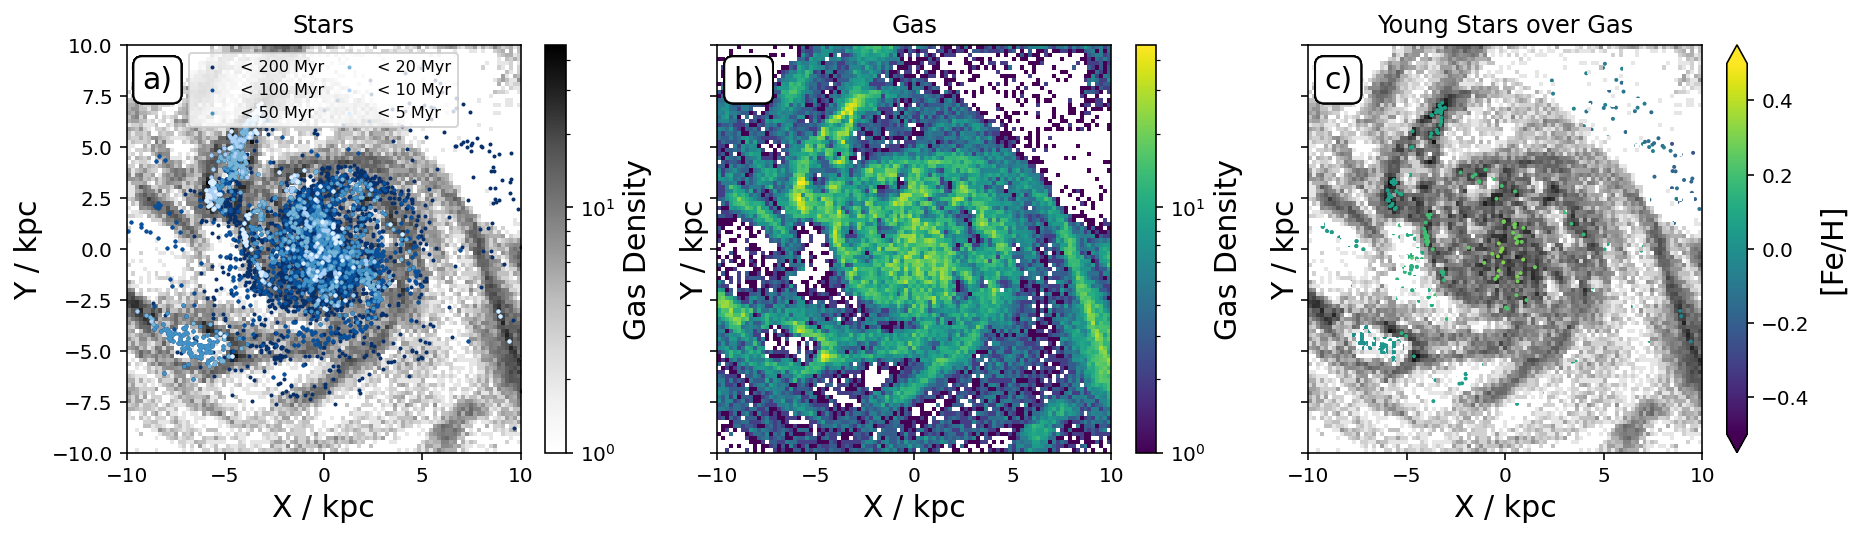

In [3]:
f, gs = plt.subplots(1,3,figsize=(15,3.75),sharex=True,sharey=True)

blues = ['#08306b', '#08519c', '#4292c6',  '#77b4d6',  '#abcff5', '#ddeeff']

for age_index, maximum_age in enumerate([200,100,50, 20, 10, 5]): # Myr

    youngest_stars = (
        (simulation_lite_stars['age'] < maximum_age/1000.) &
        (np.sqrt(
            simulation_lite_stars['x']**2 + simulation_lite_stars['y']**2
        ) < 100) # galactocentric radius within 100 kpc
    )

    spatial_extends = [30,10] # kpc
    spatial_extends = [10] # kpc
    
    for spatial_extend in spatial_extends:

        ax = gs[0]
        ax.set_title('Stars')# < '+str(maximum_age)+' Gyr')
        ax.text(0.04,0.95,panels[0],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
        ax.set_xlabel('X / kpc')
        ax.set_ylabel('Y / kpc')
        
        h = ax.hist2d(
            simulation_lite_gas['x'],
            simulation_lite_gas['y'],
            bins = (
                np.linspace(-spatial_extend, spatial_extend,100),
                np.linspace(-spatial_extend, spatial_extend,100)
            ),
            cmin = 1, cmap = 'Greys', zorder=0,
            norm = LogNorm()
        );
        if age_index == 0:
            cbar = plt.colorbar(h[-1], ax=ax)
            cbar.set_label('Gas Density')
        s = ax.scatter(
            simulation_lite_stars['x'][youngest_stars],
            simulation_lite_stars['y'][youngest_stars],
            label = '< '+str(maximum_age)+' Myr',
            s = 1, c = blues[age_index], zorder=1
        );
        ax.legend(ncol=2, fontsize=8, columnspacing = 0.5, markerscale = 1, loc='upper center')

        ax = gs[1]
        ax.set_title('Gas')
        ax.text(0.04,0.95,panels[1],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
        ax.set_xlabel('X / kpc')
        ax.set_ylabel('Y / kpc')

        h = ax.hist2d(
            simulation_lite_gas['x'],
            simulation_lite_gas['y'],
            bins = (
                np.linspace(-spatial_extend, spatial_extend,100),
                np.linspace(-spatial_extend, spatial_extend,100)
            ),
            cmin = 1,
            norm = LogNorm()
        );
        if age_index == 0:
            cbar = plt.colorbar(h[-1], ax=ax)
            cbar.set_label('Gas Density')
        
        ax = gs[2]
        ax.set_title('Young Stars over Gas')
        ax.text(0.04,0.95,panels[2],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
        ax.set_xlabel('X / kpc')
        ax.set_ylabel('Y / kpc')

        h = ax.hist2d(
            simulation_lite_gas['x'],
            simulation_lite_gas['y'],
            bins = (
                np.linspace(-spatial_extend, spatial_extend,100),
                np.linspace(-spatial_extend, spatial_extend,100)
            ),
            cmin = 1, cmap = 'Greys',
            norm = LogNorm()
        );
        s = ax.scatter(
            simulation_lite_stars['x'][youngest_stars],
            simulation_lite_stars['y'][youngest_stars],
            c = simulation_lite_stars['Fe_H'][youngest_stars],
            s = 1,
            vmin = -0.5, vmax = 0.5
        );
        if age_index == 0:
            cbar = plt.colorbar(s, ax=ax, extend='both')
            cbar.set_label('[Fe/H]')

        plt.savefig(simulation_name+'_young_stars_i'+str(age_index)+'.png',dpi=300,bbox_inches='tight')

plt.show()
plt.close()

In [4]:
# make a GIF!
os.system('convert -delay 180 '+simulation_name+'_young_stars_*.png '+simulation_name+'_young_stars.gif');